wkn_514000  wkn_515100  wkn_519000  wkn_543900  wkn_555200  wkn_555750  \
0          64.00      21.450      35.150       39.27      17.380      14.040   
1          64.15      21.780      35.700       39.50      17.080      14.180   
2          64.00      21.750      35.400       39.70      17.330      14.360   
3          65.50      22.240      36.300       39.85      17.350      14.600   
4          65.01      22.290      36.350       39.80      17.550      14.580   
5          64.65      22.025      36.350       39.65      17.720      14.450   
6          63.90      21.900      36.150       38.75      17.730      14.350   
7          63.10      21.935      35.700       38.50      17.780      14.270   
8          62.85      21.975      35.830       38.32      17.680      14.350   
9          62.10      21.675      35.300       38.00      17.480      14.230   
10         61.35      21.925      35.650       37.90      17.290      14.340   
11         61.50      22.025      35.900      

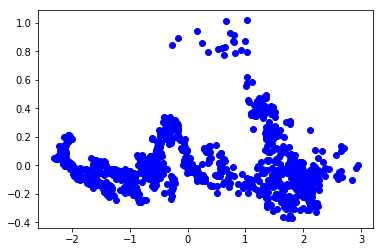

In [18]:
import os
import numpy as np
from sklearn import datasets
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

#Cargamos los datos
#os.chdir(r"D:\DeptIA\congresos\cuantica")
#data = pd.read_csv("DAX_PERFORMANCE_INDEX.csv", sep=';')
url = "https://raw.githubusercontent.com/ibonreinoso/qiskit-hackathon-bilbao-19/master/DAX_PERFORMANCE_INDEX.csv"
data = pd.read_csv(url, sep=';')
#Creamos un  dataset sin label para el no supervisado
# El primer paso es conocer nuestros datos.
# Realizamos una primera visualizacion.
# EL objetivo es precedir la dureza del cemento.cd
print(data)

# Visualizamos los 10 primero datos, de una manera mas comoda.
data.head(n=10)
#Creamos una pca
#primero estandarizamos los datos
# Standardizing the features
DataX = data.drop(['wkn_500340'], axis = 1)
DataX = DataX.loc[:,['wkn_515100', 'wkn_575200']]
print(DataX)

from sklearn.preprocessing import StandardScaler
DataNorm = StandardScaler().fit_transform(DataX)

DataNorm = pd.DataFrame(DataNorm)
print(DataNorm)

#PCA Projection to 2D
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(DataNorm)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

print(pca.explained_variance_ratio_)  

plt.plot('principal component 1','principal component 2', 'bo', data=principalDf)

In [ ]:
#Calculamos la regresion con computacion cuántica

In [19]:
DataPred = DataNorm

In [20]:
DataPred['Label'] = data.loc[:,['wkn_500340']]

In [21]:
print(DataPred)

0         1    Label
0    -1.652004 -1.372919  24.2875
1    -1.611785 -1.317788  24.6250
2    -1.615441 -1.316167  24.6500
3    -1.555722 -1.290223  24.9750
4    -1.549628 -1.289412  24.8750
5    -1.581926 -1.289412  24.5500
6    -1.597160 -1.297520  24.6875
7    -1.592894 -1.309681  24.6750
8    -1.588019 -1.316978  24.6250
9    -1.624582 -1.342111  24.6500
10   -1.594113 -1.351840  24.4125
11   -1.581926 -1.347786  24.4250
12   -1.591066 -1.358326  24.5500
13   -1.597160 -1.377784  24.5500
14   -1.591066 -1.376973  24.7250
15   -1.584972 -1.385080  24.7250
16   -1.591066 -1.398863  24.6000
17   -1.592894 -1.410213  24.5000
18   -1.612395 -1.439400  24.3250
19   -1.606301 -1.411024  24.4250
20   -1.591066 -1.411024  24.2250
21   -1.636770 -1.443454  23.8250
22   -1.639817 -1.461290  23.6500
23   -1.673333 -1.483991  23.4625
24   -1.633723 -1.469398  24.0250
25   -1.630676 -1.491288  24.1250
26   -1.573394 -1.432104  24.5500
27   -1.572785 -1.420753  24.6500
28   -1.580707 -1.428861  2

In [ ]:
#Calculamos el LHH de la matriz

In [22]:
Dmatrix = DataPred.iloc[:256,0:2]

In [23]:
b = np.zeros((256, 254))

In [24]:
matrix = np.append(Dmatrix.to_numpy(), b, axis = 1)

In [25]:
np.shape(matrix)

(256, 256)

In [238]:
#matrix = Dmatrix.to_numpy().reshape(1107,2)

In [26]:
matrix = matrix.tolist()

In [27]:
DVector = DataPred.iloc[:256,-1]

In [266]:
#vector = DVector.to_numpy().reshape(1107,1)

In [28]:
vector = DVector.tolist()

In [29]:
np.shape(vector)

(256,)

In [30]:
from qiskit.aqua import run_algorithm
from qiskit.aqua.input import LinearSystemInput
from qiskit.quantum_info import state_fidelity
from qiskit.aqua.algorithms.classical import ExactLSsolver
import numpy as np

In [31]:
params = {
    'problem': {
        'name': 'linear_system'
    },
    'algorithm': {
        'name': 'HHL'
    },
    'eigs': {
        'expansion_mode': 'suzuki',
        'expansion_order': 2,
        'name': 'EigsQPE',
        'num_ancillae': 3,
        'num_time_slices': 50
    },
    'reciprocal': {
        'name': 'Lookup'
    },
    'backend': {
        'provider': 'qiskit.BasicAer',
        'name': 'statevector_simulator'
    }
}

def fidelity(hhl, ref):
    solution_hhl_normed = hhl / np.linalg.norm(hhl)
    solution_ref_normed = ref / np.linalg.norm(ref)
    fidelity = state_fidelity(solution_hhl_normed, solution_ref_normed)
    print("fidelity %f" % fidelity)

In [32]:
params3 = params
params3['input'] = {
    'name': 'LinearSystemInput',
    'matrix': matrix,
    'vector': vector
}
params3['reciprocal'] = {
    'negative_evals': True
}
params3['eigs'] = {
    'negative_evals': True
}

In [33]:
result = run_algorithm(params3)
print("solution ", np.round(result['solution'], 5))

result_ref = ExactLSsolver(matrix, vector).run()
print("classical solution ", np.round(result_ref['solution'], 5))

print("probability %f" % result['probability_result'])
fidelity(result['solution'], result_ref['solution'])